<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Code-in-Python/blob/master/04_Outliers_%26_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Outliers 
  # Outlier is a data point that differs significantly from other observations
  # Outlier may be due to variability in the measurement or it may indicate experimental error
  # Outlier are sometimes excluded from the data set

# Technique to Detect Outlier - Box Plot and Z-Score

# Box Plot
  # Box plot is the non-parametric method
  # It display variation in without making any assumptions of the underlying distribution
  # Graphical representation which represent follwing values as follows
    # Minimum/Lower Range : the lowest data point excluding any outliers
    # Maximum/Upper Range : the largest data point excluding any outliers
    # Median (Q2 / 50th percentile) : the middle value of the dataset
    # First quartile (Q1 / 25th percentile) : 
        # Also known as the lower quartile qn(0.25)
        # it is the median of the lower half of the dataset
    # Third quartile (Q3 / 75th percentile) : 
        # Also known as the upper quartile qn(0.75)
        # it is the median of the upper half of the dataset
    # Outlier are shown as dot or star 

# Z Score
  # It finds the distribution of Normal Data
  # In Normal Distribution, Mean is 0 and Standard Deviation is 1
  # In Z Score we will rescale the data to the center
  # And check for the data which are too far from center will be TREATED AS OUTLIER
  # In most case we take the value upto 3 (3 SD of mean, 99.7% of values within)  
  # So Z Score which are more than 3 will be treated as Outliers

# Outlier Treatment 
  # Remove the outlier from the dataset based on Upper and Lower Range respectively

# Missing Values - 
  # The absence of values is a cause of concern for datasets and in Machine Learning model
  # When collecting observations about a variable, missing values can occur due to
    # 1. An error in machinery/equipment
    # 2. Error on part of the researcher
    # 3. Unavailable respondents
    # 4. Accidental deletion of observations
    # 5. Forgetfulness on part of the respondents
    # 6. Error in accounting, etc.

# Methods to impute Missing Values - Median, Mode and KNN Imputation

# Impute with
  # Median Value - For Continuous Data
  # Mode Value - For Categorical Data 

# KNN Imputation
  # Each sample’s missing values are imputed using the mean value from n_neighbors 
  # nearest neighbors found in the training set
  # Two samples are close if the features that neither is missing are close
  # By default, a euclidean distance metric that supports missing values
  # nan_euclidean_distances, is used to find the nearest neighbors
  # For imputing missing values in CATEGORICAL VALUES, 
  # we have to encode the categorical values into numeric values
  # kNNImputer works only for numeric variables
  # We can perform this using a mapping of categories to numeric variables.

In [2]:
# Libraries 
from sklearn import datasets 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Iris Dataset for Classification
# Load Dataset
iris = datasets.load_iris()
# Convert to DataFrame
iris_pd = pd.DataFrame(iris.data)
# Feature Name
iris_pd.columns = iris.feature_names
# Target Variable
iris_pd["Class"] = iris.target
# iris_pd is the final dataset

# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target

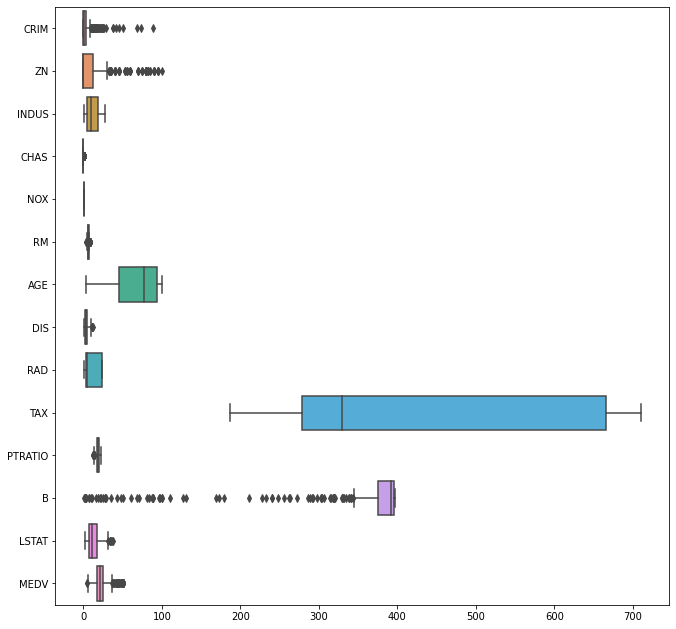

In [4]:
# Outlier Detection
# Boxplot - Outlier shown with a dot, small circle or star

# For IRIS Dataset
fig, ax = plt.subplots(figsize=(11,11)) #Sample figsize in inches,change the number accordingly
sns.boxplot(data = boston_pd,orient = 'h',ax=ax)

# Inference :
# Too Confusing, lets choose variable one 

DIS Column :
SUMMARY : 
count    506.00
mean       3.80
std        2.11
min        1.13
25%        2.10
50%        3.21
75%        5.19
max       12.13
Name: DIS, dtype: float64
BOX PLOT VALUES : 
First Quartile : 2.1
Second Quartile : 5.19
IQR Range : 3.09
Lower Range : -2.53
Upper Range : 9.82


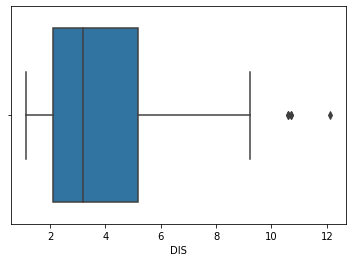

In [5]:
# Considering only one column in Boston Dataset i.e, 'DIS'
print("DIS Column :")
print("SUMMARY : ")
print(boston_pd['DIS'].describe().round(2))

def boxplot(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = (Q3 - Q1)
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return Q1,Q3,IQR,lower_range,upper_range

Q1,Q3,IQR,lower_range,upper_range = boxplot(boston_pd.DIS)
print("BOX PLOT VALUES : ")
print("First Quartile :",Q1.round(2))
print("Second Quartile :",Q3.round(2))
print("IQR Range :",IQR.round(2))
print("Lower Range :",lower_range.round(2))
print("Upper Range :",upper_range.round(2))

sns.boxplot(boston_pd['DIS'])
# Inference : 
# For DIS Column in Boston Dataset
# Lower Range : -2 so anything less than -2 will be treated as Outlier
# Minimum Value : 1.1 which is greater than -2 so not an outlier
# 25% Percentile / 1st Quartile / Lower Quartile / Q1 : 2.1
# 50% Percentile / Median / 2nd Quantile / Q2 : 3.2
# 75% Percentile / 3rd Quartile / Higher Quartile / Q3 : 5.1
# IQR Range / Q3 - Q1 : 3.08
# Lower Range : 9.8 so anything more than 9.8 will be treated as Outlier
# Maximum Value : 12.1 which is greater than 9.8 so IT IS AN OUTLIER

In [6]:
# Upper and Lower Range of the dataset

upper_outlier = len(boston_pd[boston_pd.DIS > upper_range])
lower_outlier = len(boston_pd[boston_pd.DIS < lower_range])
total = len(boston_pd[(boston_pd.DIS < lower_range) | (boston_pd.DIS > upper_range)])

print("Total Range is as folows")
print("Lower Range :",lower_range.round(2))
print("Upper Range :", upper_range.round(2))
print("So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS")
print("Total Outlier ABOVE UPPER RANGE :",upper_outlier)
print("Total Outlier BELOW LOWER RANGE :",lower_outlier)
print("Total Outlier in 'DIS' Column in Boston Dataset :", total)

Total Range is as folows
Lower Range : -2.53
Upper Range : 9.82
So Number should not be less than 'Lower Range' or more than 'Upper Range' else OUTLIERS
Total Outlier ABOVE UPPER RANGE : 5
Total Outlier BELOW LOWER RANGE : 0
Total Outlier in 'DIS' Column in Boston Dataset : 5


In [7]:
# Z Score for Detecting Outlier

z = np.abs(stats.zscore(boston_pd.DIS))
print("First 5 rows of Z-Score are")
print(z[:5]) 
print("\n")
print("Filtering out Z-Score > 3")
print("Row Number where Z-Score greater than 3")
print(np.where(z>3))

print("\n")
print("Checking exact value of the 'DIS' column which are outliers")
boston_pd.loc[[351,352,353,354,355],['DIS']]

# Inference : 
# Total Outliers are 5 whose row number are 351,352,353,354 and 355
# All the outlier are having value more than 9.8
# So Box Plot and Z score almost give exact same output for detecting outlier 

First 5 rows of Z-Score are
[0.1402136  0.55715988 0.55715988 1.07773662 1.07773662]


Filtering out Z-Score > 3
Row Number where Z-Score greater than 3
(array([351, 352, 353, 354, 355]),)


Checking exact value of the 'DIS' column which are outliers


,DIS
351,10.7103
352,10.7103
353,12.1265
354,10.5857
355,10.5857


In [8]:
# Outlier Treatment 

# Replacing Value below lower range with lower range value
# AND Replacing Value above higher range with higher range value

print("Lower Range :",lower_range.round(1))
print("Upper Range :",upper_range.round(1))
boston_pd['DIS'] = np.where(boston_pd['DIS'] < -2.5, -2.5, boston_pd['DIS'])
boston_pd['DIS'] = np.where(boston_pd['DIS'] > 9.8, 9.8, boston_pd['DIS'])

print("After Outlier Treatment")
print(boston_pd.loc[[351,352,353,354,355],['DIS']])
print("Hence Outliers values are replaced")

Lower Range : -2.5
Upper Range : 9.8
After Outlier Treatment
     DIS
351  9.8
352  9.8
353  9.8
354  9.8
355  9.8
Hence Outliers values are replaced


In [9]:
# Missing Values
# For this we are considering FLIGHT DATASET

from nycflights13 import flights
flights.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30T12:00:00Z


In [10]:
# When there is a missing value, it will show as True

data_missing = flights.isna()
data_missing.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336772,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336773,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
336774,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
336775,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False


In [11]:
# Column Wise Missing Value Count

data_missing_sum = data_missing.sum()
print("DATA MISSING COLUMN WISE")
print(data_missing_sum)

# Inference : 
# dep_time has 8255 missing data points
# arr_time has 8713 missing data points

DATA MISSING COLUMN WISE
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [12]:
# Column Wise Missing Value Percentage

print("Data Missing Column Wise Percentage")
(data_missing_sum/len(flights)).round(2)*100

# Inference : 
# dep_time column has 2% Data Missing
# arr_time column has 3% Data Missing

Data Missing Column Wise Percentage


year              0.0
month             0.0
day               0.0
dep_time          2.0
sched_dep_time    0.0
dep_delay         2.0
arr_time          3.0
sched_arr_time    0.0
arr_delay         3.0
carrier           0.0
flight            0.0
tailnum           1.0
origin            0.0
dest              0.0
air_time          3.0
distance          0.0
hour              0.0
minute            0.0
time_hour         0.0
dtype: float64

In [13]:
# Median Value Imputation

print("Total Missing Rows in 'Dep_Delay' Column :",flights['dep_delay'].isna().sum())
print("Last 6 Rows of 'Dep_Delay' Column")
print(flights.dep_delay.tail())

Total Missing Rows in 'Dep_Delay' Column : 8255
Last 6 Rows of 'Dep_Delay' Column
336771   NaN
336772   NaN
336773   NaN
336774   NaN
336775   NaN
Name: dep_delay, dtype: float64


In [14]:
# After Imputation with Median

print("After Imputation with Median")
median = flights['dep_delay'].median()
flights['dep_delay'].fillna(median, inplace = True)
print("MEDIAN value of 'dep_delay' :",median)
print("Total Missing Rows now in 'Dep_Delay' :",flights['dep_delay'].isna().sum())
print("Last 6 Rows in 'Dep_Delay' Column")
print(flights.dep_delay.tail())

After Imputation with Median
MEDIAN value of 'dep_delay' : -2.0
Total Missing Rows now in 'Dep_Delay' : 0
Last 6 Rows in 'Dep_Delay' Column
336771   -2.0
336772   -2.0
336773   -2.0
336774   -2.0
336775   -2.0
Name: dep_delay, dtype: float64


In [15]:
# Mode Imputation - Impute with a value that occur most often in a column

# Initializing the list
data = [['Sandipan',27,'male'],
        ['Nandita',26,'female'],
        ['Santosh',25,'male'],
        ['Ashish',29,'male'],
        ['Nishu',26,None],
        ['Aisha',27,None],
        ['Vaibhav',None,None]]

# Creating Pandas Dataframe
df = pd.DataFrame(data, columns = ['Name','Age','Gender'])
df

,Name,Age,Gender
0,Sandipan,27.0,male
1,Nandita,26.0,female
2,Santosh,25.0,male
3,Ashish,29.0,male
4,Nishu,26.0,None
5,Aisha,27.0,None
6,Vaibhav,NaN,None


In [16]:
# Data Types in the dataset

print("Datatypes present in the dataset")
df.dtypes

Datatypes present in the dataset


Name       object
Age       float64
Gender     object
dtype: object

In [17]:
# Impute whole dataset with MODE

# Filter columns with Object Datatype and fill with MODE
df.select_dtypes(include = 'object').fillna(
    df.select_dtypes(include='object').mode().iloc[0]
)

# Inference : 
# As we can observe all the values are imputed with MALE
# In reality, missing values are 2 Females and 1 Male
# So accuracy = 1/3 = 0.33 

,Name,Gender
0,Sandipan,male
1,Nandita,female
2,Santosh,male
3,Ashish,male
4,Nishu,male
5,Aisha,male
6,Vaibhav,male


In [18]:
# Impute whole dataset with MEDIAN

# Filter columns with Float and Integer datatypes and fill with MEDIAN
df.select_dtypes(include='float64').fillna(
    df.select_dtypes(include='float64').median().iloc[0]
)

,Age
0,27.0
1,26.0
2,25.0
3,29.0
4,26.0
5,27.0
6,26.5


In [19]:
# KNN Imputation

# First create a small dataframe with missing values in it
dict = {'First':[100, 90, np.nan, 95], 
        'Second': [30, 45, 56, np.nan], 
        'Third':[np.nan, 40, 80, 98]} 
  
# Creating a dataframe from list 
df = pd.DataFrame(dict)
df

,First,Second,Third
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [20]:
# Intializing KNN imputation

imputer = KNNImputer()
df_filled = imputer.fit_transform(df)
df_filled

# Inference :
# As you can see below, that’s the entire missing value is imputated
# It’s as simple using median but more effective and accurate than using a simple average

array([[100.        ,  30.        ,  72.66666667],
       [ 90.        ,  45.        ,  40.        ],
       [ 95.        ,  56.        ,  80.        ],
       [ 95.        ,  43.66666667,  98.        ]])

In [21]:
# Another Example of KNN Imputation

# Initializing the list
data = [['Sandipan',27,'male'],
        ['Nandita',26,'female'],
        ['Santosh',25,'male'],
        ['Ashish',29,'male'],
        ['Nishu',26,None],
        ['Aisha',27,None],
        ['Vaibhav',28,None]]

# Creating Pandas Dataframe
df = pd.DataFrame(data, columns = ['Name','Age','Gender'])
df

,Name,Age,Gender
0,Sandipan,27,male
1,Nandita,26,female
2,Santosh,25,male
3,Ashish,29,male
4,Nishu,26,None
5,Aisha,27,None
6,Vaibhav,28,None


In [22]:
# For imputing missing values in categorical variables

# We have to encode the categorical values into numeric values
# kNNImputer works only for numeric variables
# We can perform this using a mapping of categories to numeric variables.
# Mapping Gender values to 0 and 1

df['GenderMap'] = df.Gender.map({'female' : 1, 'male' : 0})
df

,Name,Age,Gender,GenderMap
0,Sandipan,27,male,0.0
1,Nandita,26,female,1.0
2,Santosh,25,male,0.0
3,Ashish,29,male,0.0
4,Nishu,26,None,NaN
5,Aisha,27,None,NaN
6,Vaibhav,28,None,NaN


In [23]:
# Normally Name of a person don't help in the model

imputer = KNNImputer(n_neighbors=1) 
# k=1, we can take any number and check after every irritation
df_filled = imputer.fit_transform(df[['Age','GenderMap']])
df_filled 

# Inference : 
# In reality, Missing values are 2 Females as 1 and 1 Male as 0
# MODE method, it gave all 3 missing values as Male 
# Mode accuracy = 1/3 = 0.33
# KNN method, imputation is 1 Female and 2 Male
# KNN accuracy = 2/3 = 0.66
# Normally KNN works better than simple Median and Mode imputation 

array([[27.,  0.],
       [26.,  1.],
       [25.,  0.],
       [29.,  0.],
       [26.,  1.],
       [27.,  0.],
       [28.,  0.]])